# SpaCy

SpaCy does everything at once: tokenizing, sentence tokenizing, dependency parsing, and everything else, once you run the `nlp()` function on it. (Technically this is whatever you choose to call it, but `nlp()` is the convention.) 

In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_lg')

In [3]:
sent = "The quick brown fox jumped over the lazy dogs." 

In [4]:
doc = nlp(sent)

The result is this SpaCy `Doc` object. It has a ton of cool properties. 

In [5]:
type(doc)

spacy.tokens.doc.Doc

In some respects it behaves like a list of tokens, so you can take its length, iterate over it, and index it like you would a list: 

In [6]:
len(doc)

10

In [10]:
doc[0], doc[1]

(The, quick)

In [11]:
quick = doc[1]

In [13]:
quick.pos

84

In [14]:
quick.pos_

'ADJ'

In [15]:
quick.tag_

'JJ'

In [17]:
list(quick.children)

[]

In [19]:
list(quick.ancestors)

[fox, jumped]

In [20]:
quick.lang_

'en'

In [21]:
quick.i

1

In [23]:
[(word.i, word.tag_, word.pos_, word.text) for word in doc]

[(0, 'DT', 'DET', 'The'),
 (1, 'JJ', 'ADJ', 'quick'),
 (2, 'JJ', 'ADJ', 'brown'),
 (3, 'NN', 'NOUN', 'fox'),
 (4, 'VBD', 'VERB', 'jumped'),
 (5, 'IN', 'ADP', 'over'),
 (6, 'DT', 'DET', 'the'),
 (7, 'JJ', 'ADJ', 'lazy'),
 (8, 'NNS', 'NOUN', 'dogs'),
 (9, '.', 'PUNCT', '.')]

In [25]:
onlyNouns = [word.lemma_ for word in doc if word.pos_ == 'NOUN']
onlyNouns

['fox', 'dog']

In [27]:
[(word.text, list(word.ancestors)) for word in doc]

[('The', [fox, jumped]),
 ('quick', [fox, jumped]),
 ('brown', [fox, jumped]),
 ('fox', [jumped]),
 ('jumped', []),
 ('over', [jumped]),
 ('the', [dogs, over, jumped]),
 ('lazy', [dogs, over, jumped]),
 ('dogs', [over, jumped]),
 ('.', [jumped])]

In [32]:
sent = list(doc.sents)[0]

In [34]:
root = sent.root

In [36]:
list(root.children)

[fox, over, .]

In [38]:
list(list(root.children)[0].children)

[The, quick, brown]

We can visualize these relationships using `displacy`: 

In [39]:
from spacy import displacy

In [42]:
displacy.render(doc)

In [43]:
gardenRaw = open('../Texts/garden-party.md').read()

In [44]:
gardenStories = gardenRaw.split('\n# ')

In [45]:
[story[:30] for story in gardenStories]

['# 1. AT THE BAY.\n## Chapter 1.',
 '2. THE GARDEN PARTY.\n\nAnd afte',
 '3. THE DAUGHTERS OF THE LATE C',
 '4. MR. AND MRS. DOVE.\n\nOf cour',
 '5. THE YOUNG GIRL.\n\nIn her blu',
 '6. LIFE OF MA PARKER.\n\nWhen th',
 '7. MARRIAGE A LA MODE.\n\nOn his',
 '8. THE VOYAGE.\n\nThe Picton boa',
 '9. MISS BRILL.\n\nAlthough it wa',
 '10. HER FIRST BALL.\n\nExactly w',
 '11. THE SINGING LESSON.\n\nWith ',
 '12. THE STRANGER\n\nIt seemed to',
 '13. BANK HOLIDAY.\n\nA stout man',
 '14. AN IDEAL FAMILY.\n\nThat eve',
 "15. The Lady's Maid\n\nEleven o'"]

In [46]:
gardenParty = gardenStories[1]

In [47]:
gardenParty[:100]

'2. THE GARDEN PARTY.\n\nAnd after all the weather was ideal. They could not have had a more\nperfect da'

In [48]:
gardenDoc = nlp(gardenParty)

In [65]:
import collections
import pandas as pd
%matplotlib inline

In [55]:
collections.Counter([(doc.text) for doc in list(gardenDoc.noun_chunks)]).most_common(50)

[('she', 92),
 ('it', 61),
 ('you', 58),
 ('Laura', 58),
 ('I', 51),
 ('She', 42),
 ('they', 35),
 ('them', 27),
 ('It', 24),
 ('her', 21),
 ('They', 17),
 ('he', 14),
 ('him', 13),
 ('Jose', 12),
 ('we', 12),
 ('He', 12),
 ('What', 12),
 ('me', 11),
 ('Mrs.\xa0Sheridan', 11),
 ('You', 9),
 ('Laurie', 9),
 ('Sadie', 9),
 ('her mother', 6),
 ('the men', 5),
 ('the marquee', 5),
 ('everything', 5),
 ('the band', 5),
 ('who', 5),
 ('"I', 5),
 ('what', 5),
 ('the door', 5),
 ("'s", 5),
 ('us', 5),
 ('people', 4),
 ('-butter', 4),
 ('the tall fellow', 4),
 ('something', 4),
 ('herself', 4),
 ('the house', 4),
 ('the kitchen', 4),
 ('course', 4),
 ("Godber's man", 4),
 ('the lane', 4),
 ('children', 3),
 ('bread', 3),
 ('the garden', 3),
 ('the smell', 3),
 ('some one', 3),
 ('the hall', 3),
 ('her head', 3)]

In [58]:
len(list(gardenDoc.sents))

797

In [60]:
len(list(gardenDoc.sents)[30])

4

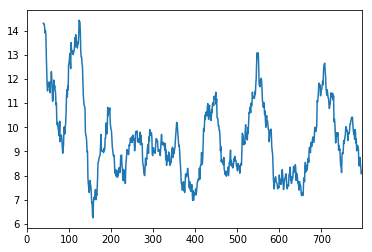

In [73]:
pd.Series([len(sent) for sent in gardenDoc.sents]).rolling(40).mean().plot()

In [76]:
collections.Counter([word.lemma_ for word in gardenDoc if word.pos_ == 'ADJ']).most_common(10)

[('little', 25),
 ('good', 13),
 ('dear', 9),
 ('big', 8),
 ('dark', 7),
 ('right', 7),
 ('tall', 6),
 ('warm', 5),
 ('green', 5),
 ('young', 5)]

In [79]:
summer = gardenDoc.ents[3]

In [85]:
summer.label_

'DATE'

In [88]:
[(w.text) for w in gardenDoc.ents if w.label_ == 'TIME']

['a single night',
 'this afternoon',
 'Good morning',
 "One o'clock",
 'this afternoon',
 'ten minutes',
 'this minute',
 'two minutes',
 'this morning',
 'this one afternoon',
 'the afternoon',
 'a\nminute']

In [90]:
collections.Counter([(w.text) for w in gardenDoc.ents if w.label_ == 'PERSON']).most_common(20)

[('Laura', 63),
 ('Jose', 19),
 ('Sadie', 12),
 ('Laurie', 11),
 ('Godber', 5),
 ('Meg', 4),
 ('Hans', 3),
 ('Sheridan', 2),
 ('Chan-ges', 2),
 ('Cook', 2),
 ('Scott', 2),
 ('Windless', 1),
 ('Mrs Sheridan', 1),
 ('Sadie\n', 1),
 ('Hans---', 1),
 ('Ta-ta-ta', 1),
 ('Tee-ta', 1),
 ('Miss Jose', 1),
 ('Laurie\n', 1),
 ('Laura\n', 1)]

In [102]:
lauraVerbs = []
for w in gardenDoc: 
    if w.text == 'Laura': 
        lauraVerbs.append(w.sent.root.lemma_)

In [103]:
collections.Counter(lauraVerbs).most_common(10)

[('say', 18),
 ('be', 11),
 ('look', 3),
 ('turn', 3),
 ('come', 2),
 ('begin', 2),
 ('want', 2),
 ('fly', 1),
 ('wish', 1),
 ('see', 1)]